3.1标量、向量、矩阵和张量

In [1]:
import numpy as np

a=np.array([1,2,4,3,8])
print(a.size)
print(a[0],a[1],a[2],a[-1])


5
1 2 4 8


3.矩阵（matrix）

In [2]:
import numpy as np

A=np.array([[1,2,3],[4,5,6]])
print(A)
print(A.size)    #显示矩阵元素总个数
print(A.shape)   #显示矩阵现状，即行行和列数。
print(A[0,0],A[0,1],A[1,1])
print(A[1,:])  #打印矩阵第2行


[[1 2 3]
 [4 5 6]]
6
(2, 3)
1 2 5
[4 5 6]


4.张量（tensor）

In [3]:
B=np.arange(16).reshape((2, 2, 4))   #生成一个3阶矩阵
print(B)
print(B.size)    #显示矩阵元素总数
print(B.shape)   #显示矩阵的维度
print(B[0,0,0],B[0,0,1],B[0,1,1])
print(B[0,1,:])


[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
16
(2, 2, 4)
0 1 5
[4 5 6 7]


5.转置(transpose) 

In [4]:
C=np.array([[1,2,3],[4,5,6]])
D=C.T       #利用张量的T属性(即转置属性)
print(C)
print(D)


[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


3.2矩阵和向量运算

In [5]:
C=np.array([[1,2,3],[4,5,6]])
b=np.array([10,20,30])
D=C+b
print(D)


[[11 22 33]
 [14 25 36]]


3.5范数

In [6]:
import numpy  as np
import numpy.linalg as LA      #导入Numpy中线性代数库

x=np.arange(0,1,0.1)  #自动生成一个[0,1)间的10个数，步长为0.1
print(x)

x1= LA.norm(x,1)            #计算1范数
x2= LA.norm(x,2)            #计算2范数
xa=LA.norm(x,np.inf)        #计算无穷范数
print(x1)
print(x2)
print(xa)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
4.5
1.68819430161
0.9


3.6特征值分解

In [7]:
import numpy as np

a = np.array([[1,2],[3,4]]) # 示例矩阵
A1 = np.linalg.eigvals(a)  # 得到特征值
A2,V1 = np.linalg.eig(a) # 其中A2也是特征值，B为特征向量
print(A1)
print(A2)
print(V1)


[-0.37228132  5.37228132]
[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


3.7奇异值分解

In [8]:
import numpy as np

Data=np.mat([[1,1,1,0,0],  
             [2,2,2,0,0],  
             [3,3,3,0,0],  
             [5,5,3,2,2],  
             [0,0,0,3,3],  
             [0,0,0,6,6]])

u,sigma,vt=np.linalg.svd(Data)
#print(u)
print(sigma)
#转换为对角矩阵
diagv=np.mat([[sigma[0],0,0],[0,sigma[1],0],[0,0,sigma[2]]])  
print(diagv)
#print(vt)


[  1.09824632e+01   8.79229347e+00   1.03974857e+00   1.18321522e-15
   2.13044868e-32]
[[ 10.98246322   0.           0.        ]
 [  0.           8.79229347   0.        ]
 [  0.           0.           1.03974857]]


3.8迹运算

In [9]:
C=np.array([[1,2,3],[4,5,6],[7,8,9]])
TrC=np.trace(C)

D=C-2
TrCT=np.trace(C.T)
TrCD=np.trace(np.dot(C,D))
TrDC=np.trace(np.dot(D,C))
print(TrC)
print(TrCT)
print(TrCD)
print(TrDC)


15
15
171
171


3.9实例：Python实现主成分分析

In [10]:
from sklearn.datasets import load_iris
import numpy as np
from numpy.linalg import eig

def pca(X, k):
    # Standardize by remove average
    X = X - X.mean(axis = 0)

    # Calculate covariance matrix:
    X_cov = np.cov(X.T, ddof = 0)

    # Calculate  eigenvalues and eigenvectors of covariance matrix
    eigenvalues, eigenvectors = eig(X_cov)

    # top k large eigenvectors
    klarge_index = eigenvalues.argsort()[-k:][::-1]
    k_eigenvectors = eigenvectors[klarge_index]

    return np.dot(X, k_eigenvectors.T)

iris = load_iris() 
X = iris.data
k = 2  #选取贡献最大的前2个特征

X_pca = pca(X, k)


我们看一下各特征值的贡献率

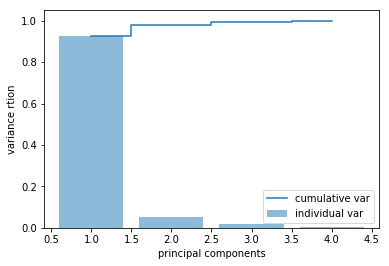

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import eig
%matplotlib inline

iris = load_iris() 
X = iris.data
X = X - X.mean(axis = 0)

# 计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues, eigenvectors = eig(X_cov)

tot=sum(eigenvalues)
var_exp=[(i / tot) for i in sorted(eigenvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,5),var_exp,alpha=0.5,align='center',label='individual var')
plt.step(range(1,5),cum_var_exp,where='mid',label='cumulative var')
plt.ylabel('variance rtion')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show()
